In [64]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from plotnine import *

C:\Users\Skywind\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
df = pd.read_csv('C:/Users/Skywind/Desktop/Python/edX - Course 1/Video_Games_Sales_as_at_22_Dec_2016.csv')

# Inspect the data and clean:

In [4]:
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
Name               16717 non-null object
Platform           16719 non-null object
Year_of_Release    16450 non-null float64
Genre              16717 non-null object
Publisher          16665 non-null object
NA_Sales           16719 non-null float64
EU_Sales           16719 non-null float64
JP_Sales           16719 non-null float64
Other_Sales        16719 non-null float64
Global_Sales       16719 non-null float64
Critic_Score       8137 non-null float64
Critic_Count       8137 non-null float64
User_Score         10015 non-null object
User_Count         7590 non-null float64
Developer          10096 non-null object
Rating             9950 non-null object
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


***We see that there are null values for some of the columns. Will drop all null values and consider only complete cases for the purpose of this analysis. Since we are not interested in the regional sales columns, let us first make sure that the null values we are removing are not part of those columns.***

In [5]:
sum(df['NA_Sales'].isna())

0

In [6]:
sum(df['EU_Sales'].isna())

0

In [7]:
sum(df['JP_Sales'].isna())

0

In [8]:
sum(df['Other_Sales'].isna())

0

***This means that the null values are coming from the columns we want to use as predictors. Since this is the case, we want to remove those and only consider complete cases for our question***

In [9]:
df_complete = df.dropna()

In [10]:
df_complete.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count
count,6825.000000,6825.000000,6825.000000,6825.000000,6825.000000,6825.000000,6825.000000,6825.000000,6825.000000
mean,2007.436777,0.394484,0.236089,0.064158,0.082677,0.777590,70.272088,28.931136,174.722344
std,4.211248,0.967385,0.687330,0.287570,0.269871,1.963443,13.868572,19.224165,587.428538
min,1985.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,4.000000
25%,2004.000000,0.060000,0.020000,0.000000,0.010000,0.110000,62.000000,14.000000,11.000000
50%,2007.000000,0.150000,0.060000,0.000000,0.020000,0.290000,72.000000,25.000000,27.000000
75%,2011.000000,0.390000,0.210000,0.010000,0.070000,0.750000,80.000000,39.000000,89.000000
max,2016.000000,41.360000,28.960000,6.500000,10.570000,82.530000,98.000000,113.000000,10665.000000


In [11]:
df_complete.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6825 entries, 0 to 16706
Data columns (total 16 columns):
Name               6825 non-null object
Platform           6825 non-null object
Year_of_Release    6825 non-null float64
Genre              6825 non-null object
Publisher          6825 non-null object
NA_Sales           6825 non-null float64
EU_Sales           6825 non-null float64
JP_Sales           6825 non-null float64
Other_Sales        6825 non-null float64
Global_Sales       6825 non-null float64
Critic_Score       6825 non-null float64
Critic_Count       6825 non-null float64
User_Score         6825 non-null object
User_Count         6825 non-null float64
Developer          6825 non-null object
Rating             6825 non-null object
dtypes: float64(9), object(7)
memory usage: 906.4+ KB


***We see that User_Score is incorrectly an object instead of a float64 value. Since it is a numerical value it should be a float64 type. Need to change this***

***All Objects except Name should be categories.***

In [12]:
df2 = df_complete.copy()

In [13]:
df2['User_Score'] = df_complete['User_Score'].astype(float)
df2['Platform'] = df_complete['Platform'].astype('category')
df2['Genre'] = df_complete['Genre'].astype('category')
df2['Rating'] = df_complete['Rating'].astype('category')
df2['Publisher'] = df_complete['Publisher'].astype('category')

In [14]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6825 entries, 0 to 16706
Data columns (total 16 columns):
Name               6825 non-null object
Platform           6825 non-null category
Year_of_Release    6825 non-null float64
Genre              6825 non-null category
Publisher          6825 non-null category
NA_Sales           6825 non-null float64
EU_Sales           6825 non-null float64
JP_Sales           6825 non-null float64
Other_Sales        6825 non-null float64
Global_Sales       6825 non-null float64
Critic_Score       6825 non-null float64
Critic_Count       6825 non-null float64
User_Score         6825 non-null float64
User_Count         6825 non-null float64
Developer          6825 non-null object
Rating             6825 non-null category
dtypes: category(4), float64(10), object(2)
memory usage: 740.1+ KB


In [15]:
df2['Platform'].value_counts()

PS2     1140
X360     858
PS3      769
PC       651
XB       565
Wii      479
DS       464
PSP      390
GC       348
PS4      239
GBA      237
XOne     159
3DS      155
PS       150
PSV      118
WiiU      89
DC        14
Name: Platform, dtype: int64

***DC(Dreamcast) has a low sample size. I'll combine this with the WiiU category and rename it to 'Other'.***

In [16]:
df2['Platform'] = df['Platform'].replace({'WiiU' : 'Other', 'DC' : 'Other'})

In [17]:
df2['Platform'].value_counts()

PS2      1140
X360      858
PS3       769
PC        651
XB        565
Wii       479
DS        464
PSP       390
GC        348
PS4       239
GBA       237
XOne      159
3DS       155
PS        150
PSV       118
Other     103
Name: Platform, dtype: int64

In [18]:
df2['Genre'].value_counts()

Action          1630
Sports           943
Shooter          864
Role-Playing     712
Racing           581
Platform         403
Misc             384
Fighting         378
Simulation       297
Strategy         267
Adventure        248
Puzzle           118
Name: Genre, dtype: int64

***All categories are appropriate here.***

In [19]:
df2['Publisher'].value_counts().head(50)

Electronic Arts                           944
Ubisoft                                   496
Activision                                492
Sony Computer Entertainment               316
THQ                                       307
Nintendo                                  291
Sega                                      284
Take-Two Interactive                      273
Konami Digital Entertainment              244
Namco Bandai Games                        239
Capcom                                    197
Atari                                     176
Microsoft Game Studios                    141
Tecmo Koei                                137
Square Enix                               134
Warner Bros. Interactive Entertainment    130
Eidos Interactive                         123
Vivendi Games                             113
Codemasters                               111
Midway Games                              103
505 Games                                  80
Deep Silver                       

***There are too many categories here. I will combine everything from Empire Interactive and under into an 'Other' category.***

In [20]:
Publisher = []
Main = ['Electronic Arts', 'Ubisoft', 'Activision', 'Sony Computer Entertainment', 'THQ', 'Nintendo', 'Sega', 'Take-Two Interactive',
       'Konami Digital Entertainment', 'Namco Bandai Games', 'Capcom', 'Atari', 'Microsoft Game Studios', 'Tecmo Koei', 'Square Enix',
       'Warner Bros. Interactive Entertainment', 'Eidos Interactive', 'Vivendi Games', 'Codemasters', 'Midway Games', '505 Games',
       'Deep Silver', 'Disney Interactive Studios', 'LucasArts', 'Acclaim Entertainment', 'Nippon Ichi Software', 'Rising Star Games',
       'Bethesda Softworks', 'D3Publisher', 'Focus Home Interactive', 'Ignition Entertainment']

for publisher in df2['Publisher']:
    if publisher in Main:
        Publisher.append(publisher)
    else:
        Publisher.append('Other')

df2['Publisher'] = Publisher
df2['Publisher'].value_counts()

Other                                     954
Electronic Arts                           944
Ubisoft                                   496
Activision                                492
Sony Computer Entertainment               316
THQ                                       307
Nintendo                                  291
Sega                                      284
Take-Two Interactive                      273
Konami Digital Entertainment              244
Namco Bandai Games                        239
Capcom                                    197
Atari                                     176
Microsoft Game Studios                    141
Tecmo Koei                                137
Square Enix                               134
Warner Bros. Interactive Entertainment    130
Eidos Interactive                         123
Vivendi Games                             113
Codemasters                               111
Midway Games                              103
505 Games                         

In [21]:
df2['Developer'].value_counts().head(51)

EA Canada                         149
EA Sports                         142
Capcom                            126
Ubisoft                           103
Konami                             95
Ubisoft Montreal                   87
EA Tiburon                         82
Omega Force                        69
Visual Concepts                    68
Nintendo                           68
Electronic Arts                    67
Traveller's Tales                  59
Codemasters                        57
Vicarious Visions                  57
Namco                              55
Yuke's                             48
TT Games                           43
Maxis                              42
Midway                             42
Neversoft Entertainment            42
Treyarch                           41
From Software                      41
Eurocom Entertainment Software     40
Square Enix                        39
Sonic Team                         35
TOSE                               34
Radical Ente

***There are too many categories here as well. Will include the first 50 categories. Will throw the other ones into the 'Other' Category***

In [22]:
Developer = []
Main = ['EA Canada', 'EA Sports', 'Capcom', 'Ubisoft', 'Konami', 'Ubisoft Montreal', 'EA Tiburon', 'Omega Force', 'Visual Concepts',
       'Nintendo', 'Electronic Arts', "Traveller's Tales", 'Vicarious Visions', 'Codemasters', 'Namco', "Yuke's", 'TT Games',
       'Maxis', 'Neversoft Entertainment', 'Midway', 'Treyarch', 'From Software', 'Eurocom Entertainment Software', 'Square Enix',
       'Sonic Team', 'TOSE', 'Radical Entertainment', 'Sega', 'Arc System Works', 'Rebellion', 'High Voltage Software',
       'Artificial Mind and Movement', 'Harmonix Music Systems', 'Koei', 'Climax Group', 'Gearbox Software', 'SCEA San Diego Studios',
       'Rainbow Studios', 'KCET', 'EA DICE', 'EA Games', 'Krome Studios', 'Criterion Games', 'Griptonite Games', 'Acclaim', 
       'Ubisoft Shanghai', 'CyberConnect2', 'BioWare', 'Exient Entertainment', 'Volition Inc.']

for developer in df2['Developer']:
    if developer in Main:
        Developer.append(developer)
    else:
        Developer.append('Other')

df2['Developer'] = Developer
df2['Developer'].value_counts()

Other                             4475
EA Canada                          149
EA Sports                          142
Capcom                             126
Ubisoft                            103
Konami                              95
Ubisoft Montreal                    87
EA Tiburon                          82
Omega Force                         69
Nintendo                            68
Visual Concepts                     68
Electronic Arts                     67
Traveller's Tales                   59
Codemasters                         57
Vicarious Visions                   57
Namco                               55
Yuke's                              48
TT Games                            43
Neversoft Entertainment             42
Midway                              42
Maxis                               42
Treyarch                            41
From Software                       41
Eurocom Entertainment Software      40
Square Enix                         39
Sonic Team               

***It could be interesting to know if the publisher was the same as the developer. Will create a new column for that.***

***First reset the index.***

In [23]:
df2 = df2.reset_index()

In [24]:
del df2['index']

In [25]:
Dev_same_publisher = []

for row in range(0, len(df2)):
    if (df2.loc[row, 'Publisher'] == df2.loc[row, 'Developer']):
        Dev_same_publisher.append(1)
    else:
        Dev_same_publisher.append(0)

df3 = df2.copy()
df3['Dev_same_publisher'] = Dev_same_publisher

In [26]:
df3['Dev_same_publisher'].value_counts()

0    5520
1    1305
Name: Dev_same_publisher, dtype: int64

In [27]:
df3['Rating'].value_counts()

T       2377
E       2082
M       1433
E10+     930
RP         1
K-A        1
AO         1
Name: Rating, dtype: int64

***K-A is Kids to adults which is the same as E for everyone. Will throw K-A with E. RP is Rating Pending, will also combine with T the most populated category.***

In [28]:
df3['Rating'] = df3['Rating'].replace({'K-A' : 'E', 'RP' : 'T'})

In [29]:
df3[df3['Rating'] == 'AO']

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,Dev_same_publisher
578,Grand Theft Auto: San Andreas,XB,2005.0,Action,Take-Two Interactive,1.26,0.61,0.0,0.09,1.95,93.0,58.0,8.6,118.0,Other,AO,0


***Will throw this title in with the M for Mature category. This title was originally released as as M with a controvesial scene added later. For the purposes of this analysis better to combine with M.***

In [30]:
df3['Rating'] = df3['Rating'].replace({'AO' : 'M'})

In [31]:
df3['Rating'].value_counts()

T       2378
E       2083
M       1434
E10+     930
Name: Rating, dtype: int64

***Examine the data again.***

In [32]:
df3.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Dev_same_publisher
count,6825.000000,6825.000000,6825.000000,6825.000000,6825.000000,6825.000000,6825.000000,6825.000000,6825.000000,6825.000000,6825.000000
mean,2007.436777,0.394484,0.236089,0.064158,0.082677,0.777590,70.272088,28.931136,7.185626,174.722344,0.191209
std,4.211248,0.967385,0.687330,0.287570,0.269871,1.963443,13.868572,19.224165,1.439942,587.428538,0.393282
min,1985.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,0.500000,4.000000,0.000000
25%,2004.000000,0.060000,0.020000,0.000000,0.010000,0.110000,62.000000,14.000000,6.500000,11.000000,0.000000
50%,2007.000000,0.150000,0.060000,0.000000,0.020000,0.290000,72.000000,25.000000,7.500000,27.000000,0.000000
75%,2011.000000,0.390000,0.210000,0.010000,0.070000,0.750000,80.000000,39.000000,8.200000,89.000000,0.000000
max,2016.000000,41.360000,28.960000,6.500000,10.570000,82.530000,98.000000,113.000000,9.600000,10665.000000,1.000000


***We see that the minimum critic count and user count are 3 and 4 respectively. Check how many there are:***

In [33]:
len(df3[(df3['Critic_Count'] < 10) | (df3['User_Count'] < 10)])

1954

***There are 1954 rows where this occurs. I will not remove these rows since there are so many. Since we are including both the critic rating and user rating, it's okay to leave the low number of votes in the data because we also have those as possible predictors.***

***Instead of year_of_release, it can be more useful to know how long the game has been out. Since the data is collected at the end of 2016, I will assume any game released in 2016 has been out for a year. 2015 for 2 years, etc.***

In [34]:
Years_since_release = []

for year in df3['Year_of_Release']:
    value_to_add = 2017 - year
    Years_since_release.append(value_to_add)

df3['Years_Since_Release'] = Years_since_release
del df3['Year_of_Release']

***Create a column for if a game is good. Will assign the value 1 if the User_Score >= 8.***

In [35]:
Good = []

for rating in df3['User_Score']:
    if rating < 8:
        Good.append(0)
    else:
        Good.append(1)

df3['Good'] = Good
df3.head()

,Name,Platform,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,Dev_same_publisher,Years_Since_Release,Good
0,Wii Sports,Wii,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E,1,11.0,1
1,Mario Kart Wii,Wii,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E,1,9.0,1
2,Wii Sports Resort,Wii,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E,1,8.0,1
3,New Super Mario Bros.,DS,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E,1,11.0,1
4,Wii Play,Wii,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E,1,11.0,0


# EDA

### How does Critic_Score compare with User_Score?

***To make the comparison, we need to multiply User_Score by 10 so that they are of the same scale***

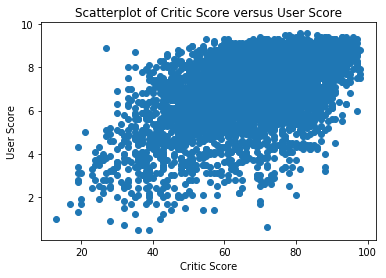

In [47]:
plt.scatter(df3['Critic_Score'], df3['User_Score'])
plt.xlabel('Critic Score')
plt.ylabel('User Score')
plt.title('Scatterplot of Critic Score versus User Score')
plt.show()

***We see that there is a positive correlation between these two variables***

In [46]:
np.corrcoef(df3['Critic_Score'], df3['User_Score'])

array([[ 1.        ,  0.58031837],
       [ 0.58031837,  1.        ]])

***From this we see that the correlation value is 0.58 which is moderately strong.***

***This means that when critics rate game low, users tend to rate games low too. And when critics rate games high, users tend to also rate games high.***

***Next, we can check their distribution with a histogram. We multiply the value of User_Score by 10 so that they are of the same scale.***

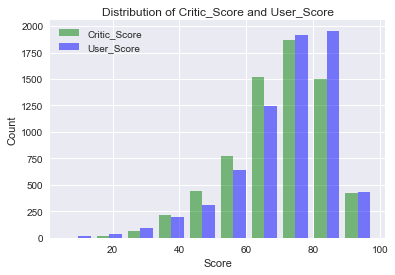

In [52]:
sns.set()

plt.hist([df3['Critic_Score'], df3['User_Score']*10], color = ['g', 'b'], alpha = 0.5)
plt.xlabel('Score')
plt.ylabel('Count')
plt.title('Distribution of Critic_Score and User_Score')
plt.legend(('Critic_Score', 'User_Score'))
plt.show()

***From this we see that the distribution of scores are fairly similar between the Critic group and the User group. We see a left skewed distribution for both groups. This shows that both users and critics give higher ratings more often than lower ratings.***

### How does each platform contribute to Global Sales?

In [72]:
platforms = df3.groupby('Platform')['Global_Sales'].sum().reset_index()
platforms = platforms.sort_values('Global_Sales', ascending = False)
platforms

,Platform,Global_Sales
7,PS2,945.97
13,X360,853.30
8,PS3,784.30
12,Wii,658.98
1,DS,382.33
9,PS4,243.03
14,XB,212.07
6,PS,206.55
10,PSP,187.92
5,PC,187.12


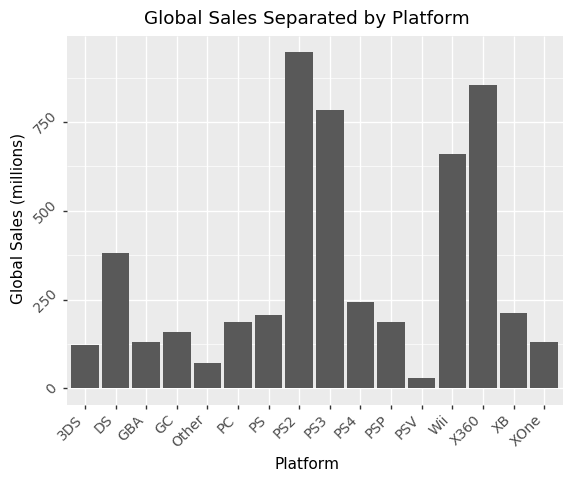

<ggplot: (30297306)>

In [73]:
ggplot(platforms, aes(x = 'Platform', y = 'Global_Sales')) + \
geom_bar(stat = "identity", position = position_dodge()) + \
theme(axis_text = element_text(size = 10, angle = 45, hjust = 1)) + \
xlab('Platform') + \
ylab('Global Sales (millions)') + \
ggtitle('Global Sales Separated by Platform')

***We see the lowest contributor to Global Sales is the PSV (PS Vita) and the highest platform contributor is the PS2 (Playstation 2). So despite that the Wii Sports game is the highest individual game contributor to Global Sales, PS2 games made more money than the Wii overall.*** 

***It is also interesting to see that the PS3 and PS4 hasn't surpassed the PS2 in sales yet, which may be due to that not enough years has passed since the release of those consoles. We see something similar happen with the Xbox 360 to the Xbox One. The Xbox 360 came out in 2005 while the Xbox One came out in 2013. The PS2 came out in 2000 and the PS3 came out in 2006. We see a six year difference for PS2 and PS3 and a 8 year difference for Xbox 360 and Xbox One. With this current dataset we can't really investigate why there is a large gap in Global Sales between these platforms, but we can speculate.***

***One possible reason for lower Global Sales in the successor systems is technology advancement. What I mean by that is that it is possible to play games without buying them. Also known as pirating. There are ways around systems to jailbreak them and be able to download the game online and burn them to a disc and then run them on the system. We notice that Xbox 360 and PS3 came out roughly around the same time. Xbox 360 came out about a year later. These sales are greater in PS3 than Xbox 360. They also see similar decreases in Global Sales in their successor systems.***

**Another reason is that there is missing data on some of the newer titles, hence not giving these other platforms enough observations to include more sales. In the cleaning stage, roughly 10000 observations were removed. So it could be that these are all observations that belong in the newer generation systems which we can verify.***

In [85]:
platforms_full = df.groupby('Platform')['Global_Sales'].sum().reset_index()


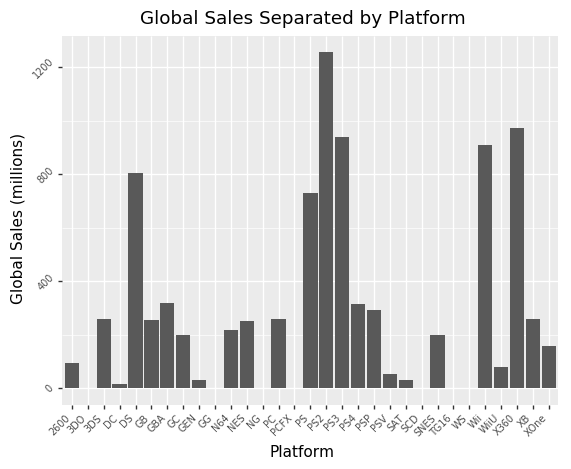

<ggplot: (-9223372036824430504)>

In [86]:
ggplot(platforms_full, aes(x = 'Platform', y = 'Global_Sales')) + \
geom_bar(stat = "identity", position = position_dodge()) + \
theme(axis_text = element_text(size = 7, angle = 45, hjust = 1)) + \
xlab('Platform') + \
ylab('Global Sales (millions)') + \
ggtitle('Global Sales Separated by Platform')

***From this we see that the relative distribution of the PS2, Xbox 360, and the newer gen systems are the same. We see increases in Global Sales for systems such as the PS1, NES, DS which are all much older. It makes sense because users and critics are less likely to have played and rated much older games. So despite that the data of global sales were available, users and critics have not rated those games. If that is the case, those null values would be removed, which is our current dataframe.***

***This means that there is another reason why there is a decrease in Global Sales for the playstation and xbox systems as newer generations are released (if time passing is not the reason)***

### How does each genre contribute to Global Sales?

In [88]:
genres = df3.groupby('Genre')['Global_Sales'].sum().reset_index()
genres = genres.sort_values('Global_Sales', ascending = False)
genres

,Genre,Global_Sales
0,Action,1203.16
10,Sports,833.85
8,Shooter,816.48
7,Role-Playing,501.37
6,Racing,476.22
3,Misc,416.26
4,Platform,377.80
2,Fighting,249.95
9,Simulation,202.70
1,Adventure,80.75


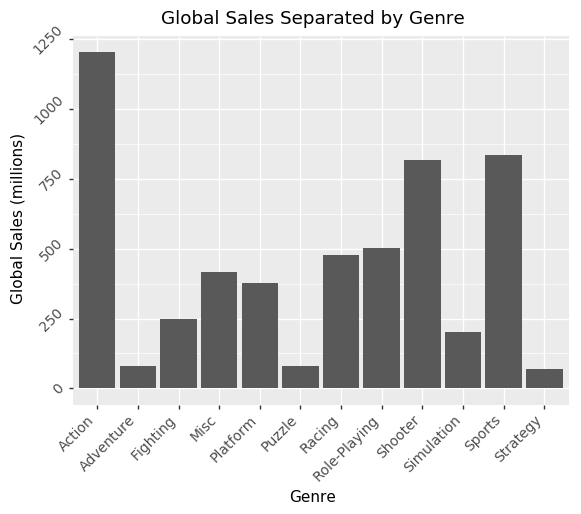

<ggplot: (33586345)>

In [89]:
ggplot(genres, aes(x = 'Genre', y = 'Global_Sales')) + \
geom_bar(stat = "identity", position = position_dodge()) + \
theme(axis_text = element_text(size = 10, angle = 45, hjust = 1)) + \
xlab('Genre') + \
ylab('Global Sales (millions)') + \
ggtitle('Global Sales Separated by Genre')

***From this we see that the Action genre is the highest contributor to Global Sales. But this doesn't neccesarily mean that Action by itself is the most popular. Games aren't neccesarily only one genre. It could be that Action paired with another genre contributes the most sales, but in this data set only one genre is listed for each game. For an example, Action may be frequently paired with Shooter. It is hard to imagine a shooter game that is not "action"-based.***

***We can also check how the distribution would look like with all cases.***

In [90]:
genres_complete = df.groupby('Genre')['Global_Sales'].sum().reset_index()

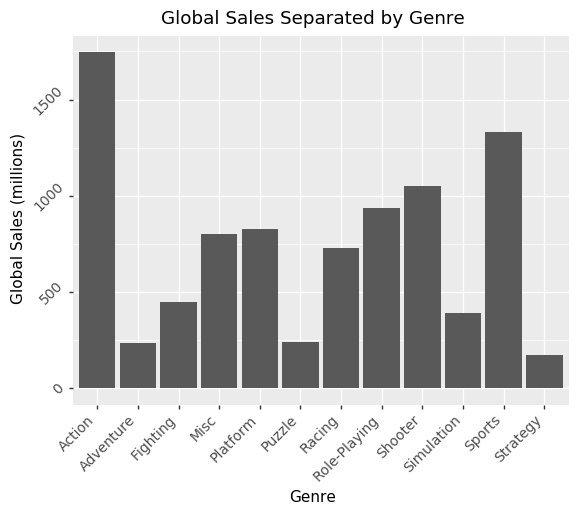

<ggplot: (-9223372036821185469)>

In [91]:
ggplot(genres_complete, aes(x = 'Genre', y = 'Global_Sales')) + \
geom_bar(stat = "identity", position = position_dodge()) + \
theme(axis_text = element_text(size = 10, angle = 45, hjust = 1)) + \
xlab('Genre') + \
ylab('Global Sales (millions)') + \
ggtitle('Global Sales Separated by Genre')

***This looks relatively the same with an increase in Sports and Role-Playing games. Since many null values were in the Critics_Count and User_Count category, it could be that these Genres are not popular on the website in the population of users and critics that use that website.***

***It could be worth investigating where exactly the null values are coming from in which column to further speculate on why they are null, but they are not the focus of my research question, so I will not.***

### How does each rating contribute to Global_Sales?

In [92]:
ratings = df3.groupby('Rating')['Global_Sales'].sum().reset_index()
ratings = ratings.sort_values('Global_Sales', ascending = False)
ratings

,Rating,Global_Sales
0,E,1961.42
2,M,1427.73
3,T,1377.35
1,E10+,540.55


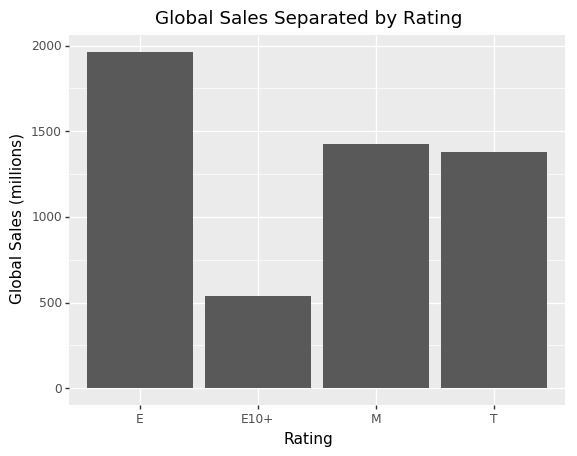

<ggplot: (33577052)>

In [94]:
ggplot(ratings, aes(x = 'Rating', y = 'Global_Sales')) + \
geom_bar(stat = "identity", position = position_dodge()) + \
xlab('Rating') + \
ylab('Global Sales (millions)') + \
ggtitle('Global Sales Separated by Rating')

***From this we see that the E rating contributes the most to Global Sales. This could be that since these games are rated for everyone, it has a larger population buying this type of game. T and M rated games have about the same contribution to Global Sales.***

***We can also check the full case.***

In [95]:
ratings_complete = df.groupby('Rating')['Global_Sales'].sum().reset_index()

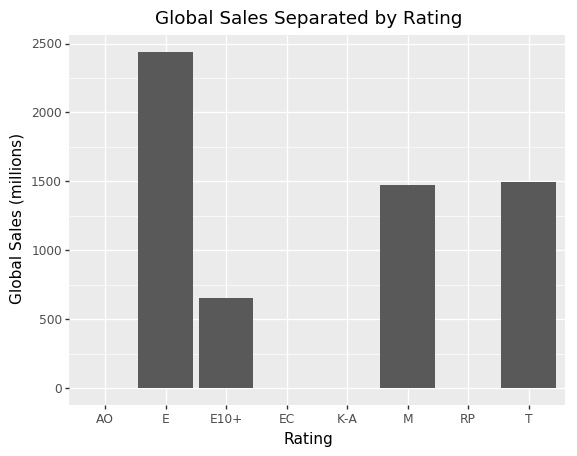

<ggplot: (-9223372036821141472)>

In [96]:
ggplot(ratings_complete, aes(x = 'Rating', y = 'Global_Sales')) + \
geom_bar(stat = "identity", position = position_dodge()) + \
xlab('Rating') + \
ylab('Global Sales (millions)') + \
ggtitle('Global Sales Separated by Rating')

***We see pretty much the same thing. This means that despite having 10000 less observations, we have the same shape. This could mean that this is the "true" distribution of global sales by rating.***

### Does Years since release correlate to higher global sales?

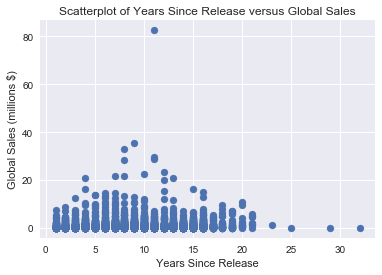

In [97]:
plt.scatter(df3['Years_Since_Release'], df3['Global_Sales'])
plt.xlabel('Years Since Release')
plt.ylabel('Global Sales (millions $)')
plt.title('Scatterplot of Years Since Release versus Global Sales')
plt.show()

***From this we see that there is no linear relationship between years since release and Global Sales. Older games does not seem to have more sales than newer games.***